In [1]:
pip install hpsklearn

     |████████████████████████████████| 163kB 13.6MB/s 
  Created wheel for hpsklearn: filename=hpsklearn-0.1.0-cp36-none-any.whl size=23914 sha256=1593eddb70230de7f744a7fcbfbb0bca4c6b7955215d6255eab099b9fdb9e91c
  Stored in directory: /root/.cache/pip/wheels/41/ee/c4/3c267cbf78f0905434ee36b915d97a20610ad3af7ff3c75852
Successfully built hpsklearn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hyperopt import tpe, hp, fmin, Trials, STATUS_OK
from hpsklearn import HyperoptEstimator, extra_trees, random_forest, svc, knn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import tree, svm, neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

#For Random Search
from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV

#Correlation matrix
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [5]:
from google.colab import files
uploaded = files.upload()

Saving seeds_dataset.txt to seeds_dataset.txt


### **PreProcess Dataset**

In [0]:
dataset = np.loadtxt("seeds_dataset.txt")
X = dataset[:,0:7]
y = dataset[:,7]

#### Correlation Matrix

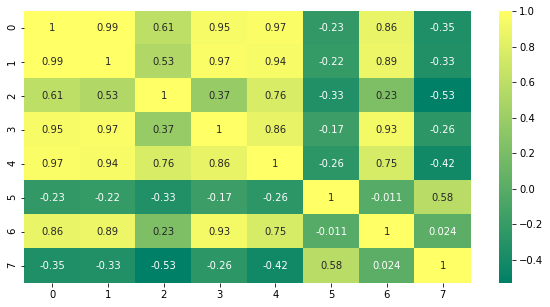

In [0]:
dataset = pd.DataFrame(dataset)
plt.figure(figsize=(10,5))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.summer)
plt.show()

In [0]:
cor_target = abs(cor[7])
relevant_features = cor_target[cor_target]
relevant_features

7
0.346058       NaN
0.327900       NaN
0.531007       NaN
0.257269       NaN
0.423463       NaN
0.577273       NaN
0.024301       NaN
1.000000    0.3279
Name: 7, dtype: float64

## **Random Search -  using RandomizedSearchCV**

#### **Classifiers:**

1. SGD Classifier:

In [0]:
clf1 = SGDClassifier(loss='hinge',  penalty='elasticnet',
                    fit_intercept=True)
#parameters and distributions to sample from
param_dist = {'average': [True, False],
              'l1_ratio': stats.uniform(0, 1),
              'alpha': loguniform(1e-4, 1e0)}

2. SVC Classifier:

In [0]:
clf2 = SVC(kernel='rbf')
param_dist2 = {'C': stats.uniform(0, 10.0),
               'gamma': stats.uniform(0, 20.0)}

3. Random Forest Classifier:

In [0]:
clf3 = RandomForestClassifier(n_estimators=100,max_features='auto')
param_dist3 = {'max_depth': stats.uniform(0,10),
                'criterion' : ('gini','entropy'),
                'max_leaf_nodes': (3,5)}

#### **Function to report best score:**

In [0]:
def report(results, n_top=1):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

#### **Random Search for each classifier:**

1. SGD Classifier:

In [0]:
n_iter_search = 1000
random_search = RandomizedSearchCV(clf1, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("Random Search: SGDClassifier")
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

print("Best Score:", random_search.best_score_,"\n" )
print("HyperParameters:\n",random_search.best_estimator_)

Random Search: SGDClassifier
RandomizedSearchCV took 16.62 seconds for 1000 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.929 (std: 0.040)
Parameters: {'alpha': 0.00012325786763877792, 'average': False, 'l1_ratio': 0.6674807666017848}

Model with rank: 1
Mean validation score: 0.929 (std: 0.054)
Parameters: {'alpha': 0.00042892609577365826, 'average': False, 'l1_ratio': 0.6238643530264248}

Best Score: 0.9285714285714285 

HyperParameters:
 SGDClassifier(alpha=0.00012325786763877792, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.6674807666017848, learning_rate='optimal',
              loss='hinge', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False)


2. SVC Classifier

In [0]:
n_iter_search = 1000
random_search = RandomizedSearchCV(clf2, param_distributions=param_dist2,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("Random Search: SVCClassifier")
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)
print("Best Score:", random_search.best_score_,"\n" )
print("HyperParameters:\n",random_search.best_estimator_)

Random Search: SVCClassifier
RandomizedSearchCV took 15.04 seconds for 1000 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.914 (std: 0.068)
Parameters: {'C': 9.550880813921763, 'gamma': 0.6187309299629873}

Model with rank: 1
Mean validation score: 0.914 (std: 0.068)
Parameters: {'C': 9.223526833100626, 'gamma': 0.6307875410680275}

Model with rank: 1
Mean validation score: 0.914 (std: 0.068)
Parameters: {'C': 9.614720550589263, 'gamma': 0.6252676747767039}

Best Score: 0.9142857142857143 

HyperParameters:
 SVC(C=9.550880813921763, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.6187309299629873, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)


3. Random Forests

In [0]:
n_iter_search = 1000
random_search = RandomizedSearchCV(clf3,param_distributions=param_dist3,n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("Random Search: Random Forests")
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

Random Search: Random Forests
RandomizedSearchCV took 578.77 seconds for 1000 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.910 (std: 0.070)
Parameters: {'criterion': 'entropy', 'max_depth': 7.877675833367079, 'max_leaf_nodes': 5}



## **Guided Search - using Hyperopt**

In [12]:
trials = Trials()  
iterations = 0
bestscore = 0

def obj(params):
    global bestscore, iterations
    iterations += 1
    accuracy = hyperopt_classifiers(params.copy())
    if accuracy > bestscore:  
        print('new best:', accuracy, 'using', params['type'])       
        bestscore = accuracy
    if iterations % 50 == 0:
        print('iteration:', iterations, ', acc:', accuracy, 'using', params)    
    return {'loss': -accuracy, 'status': STATUS_OK} 

def hyperopt_classifiers(params):
    t = params['type']
    del params['type']
    if t == 'naive_bayes':
        clf = BernoulliNB(**params)
    elif t == 'svm':
        clf = SVC(**params)
    elif t == 'random_forests':
        clf = RandomForestClassifier(**params)
    elif t == 'knn':
        clf = KNeighborsClassifier(**params)
    else:
        return 0
    return cross_val_score(clf, X, y).mean()
    
space = hp.choice('classifier_type', [
    {
        'type': 'naive_bayes',
        'alpha': hp.uniform('alpha', 0.0, 2.0)
    },
    {
        'type': 'svm',
        'C': hp.uniform('C', 0, 10.0),
        'kernel': hp.choice('kernel', ['linear', 'rbf']),
        'gamma': hp.uniform('gamma', 0, 20.0)
    },
    {
        'type': 'randomforest',
        'max_depth': hp.choice('max_depth', range(1,10)),
        'max_features': hp.choice('max_features', range(1,5)),
        'n_estimators': hp.choice('n_estimators', range(1,50)),
        'criterion': hp.choice('criterion', ["gini", "entropy"])
    },
    {
        'type': 'knn',
        'n_neighbors': hp.choice('knn_n_neighbors', range(1,10))
    }
])

hyperopt_best_score = fmin(obj, space, algo=tpe.suggest, max_evals=1000, trials=trials)
print('Parameters:', hyperopt_best_score)

new best:
0.3333333333333333
using
naive_bayes
new best:
0.8904761904761905
using
knn
new best:
0.9047619047619048
using
knn
new best:
0.9142857142857143
using
svm
new best:
0.9285714285714285
using
svm
iteration:
50
, acc:
0.8666666666666668
using
{'C': 2.2771843728087555, 'gamma': 2.577414740597715, 'kernel': 'rbf', 'type': 'svm'}
iteration:
100
, acc:
0.8904761904761905
using
{'n_neighbors': 2, 'type': 'knn'}
iteration:
150
, acc:
0.9142857142857143
using
{'C': 8.788301523534932, 'gamma': 3.756609201644453, 'kernel': 'linear', 'type': 'svm'}
iteration:
200
, acc:
0.9
using
{'C': 0.5399738510573311, 'gamma': 13.991171271724575, 'kernel': 'linear', 'type': 'svm'}
iteration:
250
, acc:
0.8904761904761905
using
{'n_neighbors': 1, 'type': 'knn'}
iteration:
300
, acc:
0.9238095238095237
using
{'C': 9.754821320163273, 'gamma': 16.10737370342162, 'kernel': 'linear', 'type': 'svm'}
iteration:
350
, acc:
0.9142857142857143
using
{'C': 8.63630597666869, 'gamma': 19.453462663086068, 'kernel': '